In [67]:
import pandas as pd
 # Load the dataset
file_path = "c:/Users/ganes/Downloads/amblyopia/Datas1.csv"
df = pd.read_csv(file_path)

In [68]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                sr #            Age  Refrective error
count  122420.000000  122420.000000     122420.000000
mean    61210.500000       8.309508          1.577353
std     35339.754314       2.785049          3.700646
min         1.000000       3.000000         -7.000000
25%     30605.750000       6.000000         -1.000000
50%     61210.500000       9.000000          2.000000
75%     91815.250000      10.000000          4.000000
max    122420.000000      16.000000          8.000000


In [69]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sr #                          0
Age                           0
Amblyopic eye                70
Vision at presentation       70
After 1 week               3610
After 2 weeks              3610
After 3 weeks              3610
After 4 weeks              3610
After 6 weeks              3610
After 8 weeks              3610
After 12 weeks             4810
After 16 weeks             7190
After 20 weeks             9570
After 24 weeks            10760
After 28 weeks            10760
After 32 Weeks            10760
Poor compliance case       4860
Squint                     1270
Holding Vision            14450
Refrective error              0
dtype: int64


In [70]:
print(df.columns)

Index(['sr #', 'Age', 'Amblyopic eye', 'Vision at presentation',
       'After 1 week', 'After 2 weeks', 'After 3 weeks', 'After 4 weeks',
       'After 6 weeks', 'After 8 weeks', 'After 12 weeks', 'After 16 weeks',
       'After 20 weeks', 'After 24 weeks', 'After 28 weeks', 'After 32 Weeks',
       'Poor compliance case', 'Squint', 'Holding Vision', 'Refrective error'],
      dtype='object')


In [71]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate entries: {num_duplicates}")

Number of duplicate entries: 0


In [72]:
numerical_columns = ['sr #', 'Age', 'Amblyopic eye', 'Vision at presentation',
       'After 1 week', 'After 2 weeks', 'After 3 weeks', 'After 4 weeks',
       'After 6 weeks', 'After 8 weeks', 'After 12 weeks', 'After 16 weeks',
       'After 20 weeks', 'After 24 weeks', 'After 28 weeks', 'After 32 Weeks',
       'Poor compliance case', 'Squint', 'Holding Vision', 'Refrective error']

In [73]:
print("\nExtreme/Unrealistic Values (IQR Method):")

# Filter only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying the extreme values
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} extreme values")


Extreme/Unrealistic Values (IQR Method):
sr #: 0 extreme values
Age: 0 extreme values
Refrective error: 0 extreme values


In [74]:
# Print the results
print(f"\nColumn: {col}")
print(f"Number of outliers: {outliers.shape[0]}")


Column: Refrective error
Number of outliers: 0


In [75]:
# If there are outliers, print the specific rows containing them
if not outliers.empty:
    print(outliers[[col]])

In [76]:
# Step 1: Handle missing values by filling them with the median
for col in numerical_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


C:\Users\ganes\AppData\Local\Temp\ipykernel_21564\807027410.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_21564\807027410.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [77]:
# Step 2: Handle Duplicates - Remove duplicate rows based on 'id' column
df.drop_duplicates(subset='sr #', inplace=True)

In [78]:
import numpy as np

In [79]:
# Step 3: Handle Extreme/Unrealistic Values using the IQR method
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[col].median()
    
    # Replace outliers with the median value
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

In [80]:
# Step 4: Save the cleaned dataset to a CSV file
output_path ="c:/Users/ganes/Downloads/amblyopia/Datas1.csv"
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: c:/Users/ganes/Downloads/amblyopia/Datas1.csv


In [81]:
correlation_matrix = df[numerical_columns].corr()
 # Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      sr #       Age  Refrective error
sr #              1.000000  0.000104          0.000028
Age               0.000104  1.000000         -0.214787
Refrective error  0.000028 -0.214787          1.000000


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
from sklearn.utils import resample

In [86]:
file_path = "c:/Users/ganes/Downloads/amblyopia/Datas1.csv"
df = pd.read_csv(file_path)

In [87]:
def augment_dataset_to_target_size(data, target_size=150000):
    n_samples_needed = target_size - len(data)
    augmented_data = resample(data, replace=True, n_samples=n_samples_needed, random_state=42)
    return pd.concat([data, augmented_data])

In [88]:
df_augmented = augment_dataset_to_target_size(df, target_size=150000)

In [89]:
print("Unique values in 'Amblyopic eye':", df['Amblyopic eye'].unique())

Unique values in 'Amblyopic eye': ['right' 'Left' 'left' nan]


In [90]:
df['Amblyopic eye'] = df['Amblyopic eye'].str.lower()

In [91]:
valid_values = ['right', 'left']
df_filtered = df[df['Amblyopic eye'].isin(valid_values)]

In [92]:
df_filtered.reset_index(drop=True, inplace=True)

In [93]:
print("Unique values in 'Amblyopic eye' after filtering:", df_filtered['Amblyopic eye'].unique())

Unique values in 'Amblyopic eye' after filtering: ['right' 'left']


In [94]:
vision_columns = ['Vision at presentation', 'After 1 week', 'After 2 weeks', 'After 3 weeks',
                  'After 4 weeks', 'After 6 weeks', 'After 8 weeks', 'After 12 weeks']

In [95]:
def convert_vision(val):
    try:
        num, denom = map(float, val.split('\\'))
        return num / denom
    except:
        return None

In [96]:
for col in vision_columns:
    df[col] = df[col].apply(convert_vision)


In [97]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['Amblyopic eye', 'After 16 weeks', 'After 20 weeks', 'After 24 weeks',
       'After 28 weeks', 'After 32 Weeks', 'Poor compliance case', 'Squint',
       'Holding Vision'],
      dtype='object')


In [98]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['sr #', 'Age', 'Amblyopic eye', 'Vision at presentation',
       'After 1 week', 'After 2 weeks', 'After 3 weeks', 'After 4 weeks',
       'After 6 weeks', 'After 8 weeks', 'After 12 weeks', 'After 16 weeks',
       'After 20 weeks', 'After 24 weeks', 'After 28 weeks', 'After 32 Weeks',
       'Poor compliance case', 'Squint', 'Holding Vision', 'Refrective error'],
      dtype='object')


In [99]:
valid_values = ['right', 'left']
df_filtered = df[df['Amblyopic eye'].isin(valid_values)].copy()  # Filter only 'right' and 'left'
df_filtered.dropna(subset=['Amblyopic eye'], inplace=True)  # Remove NaN values if any

In [100]:
df_filtered = df[df['Amblyopic eye'].isin(['right', 'left'])].copy()  

In [101]:
df_filtered.reset_index(drop=True, inplace=True)

In [102]:
print("Unique values in 'Amblyopic eye' after filtering:", df_filtered['Amblyopic eye'].unique())

Unique values in 'Amblyopic eye' after filtering: ['right' 'left']


In [103]:
encoder = LabelEncoder()
df['Amblyopiceye_encoded'] = encoder.fit_transform(df['Amblyopic eye'])

In [104]:
print("Mapping of classes to encoded values:")
for class_name, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name} -> {encoded_value}")

Mapping of classes to encoded values:
left -> 0
right -> 1
nan -> 2


In [105]:
df = df.drop(columns=non_numeric_cols, errors='ignore')

In [106]:
df.dropna(inplace=True)

In [107]:
X = df.drop(columns=['Amblyopiceye_encoded'])  # Features (all columns except the target)
y = df['Amblyopiceye_encoded'] 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [110]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
y_pred = model.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[10051     0]
 [    0  8669]]


In [113]:
import joblib

In [114]:
joblib.dump(model, 'random_forest_amblyopic_eye_model.pkl')

['random_forest_amblyopic_eye_model.pkl']

In [115]:
new_data = {
    'Vision at presentation': ['6\\6'],
    'After 1 week': ['6\\6'],
    'After 2 weeks': ['6\\9'],
    'After 3 weeks': ['6\\9'],
    'After 4 weeks': ['6\\18'],
    'After 6 weeks': ['6\\18'],
    'After 8 weeks': ['6\\12'],
    'After 12 weeks': ['6\\24'],
    # Add any other required columns that match your training data
}

In [116]:
X_new = pd.DataFrame(new_data)

In [117]:
for col in vision_columns:
    X_new[col] = X_new[col].apply(convert_vision)

In [118]:
expected_features = X_train.columns

In [119]:
for feature in expected_features:
    if feature not in X_new.columns:
        X_new[feature] = np.nan

In [120]:
X_new = X_new[expected_features]

In [121]:
y_new_pred = model.predict(X_new)

In [122]:
predicted_label = encoder.inverse_transform(y_new_pred)

In [123]:
print("Predictions for new data:", y_new_pred)

Predictions for new data: [0]


In [124]:
import matplotlib.pyplot as plt

<Figure size 1200x800 with 0 Axes>

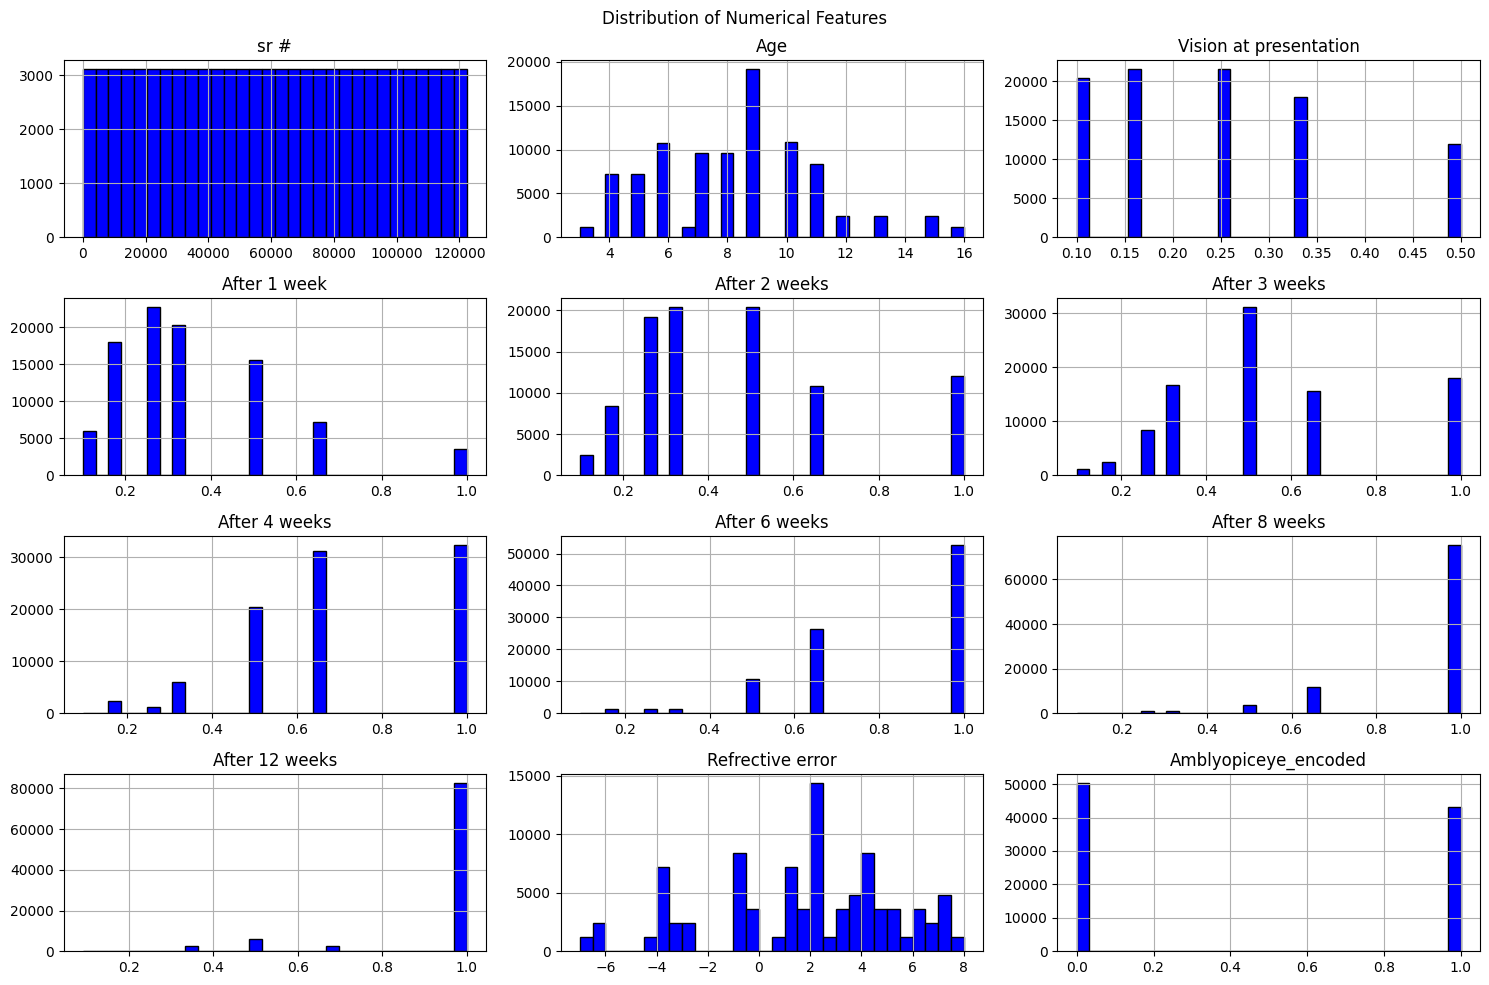

In [125]:
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [126]:
import seaborn as sns

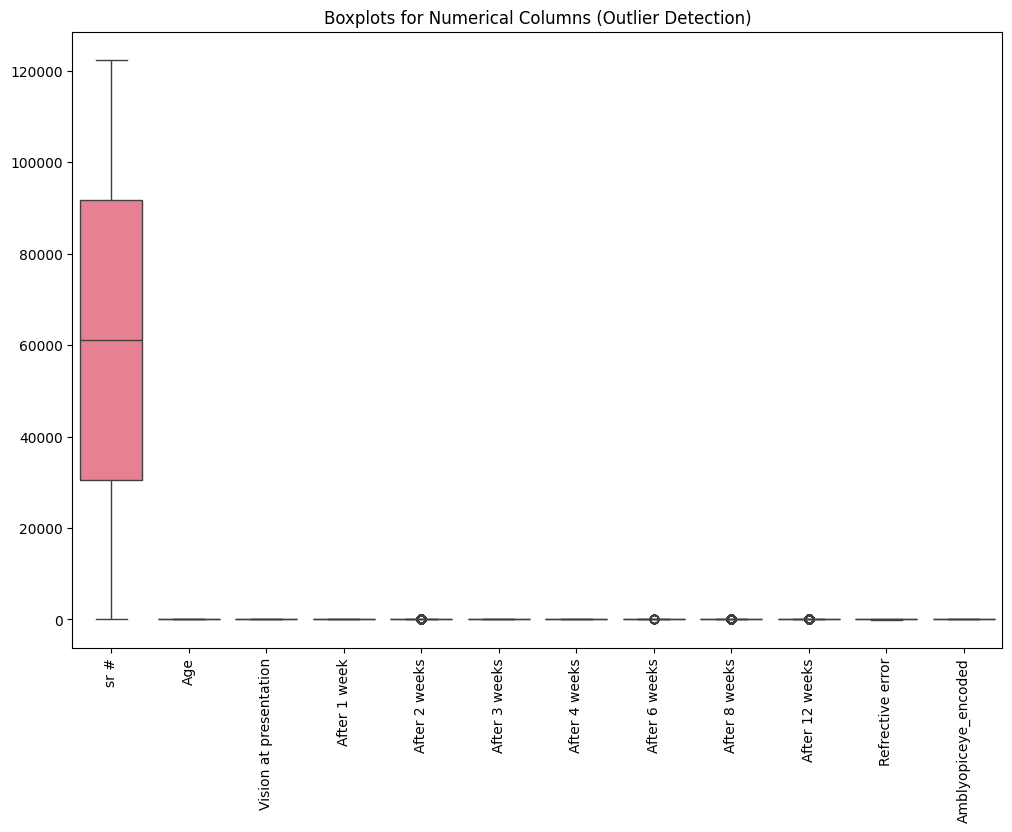

In [127]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title('Boxplots for Numerical Columns (Outlier Detection)')
plt.xticks(rotation=90)
plt.show()

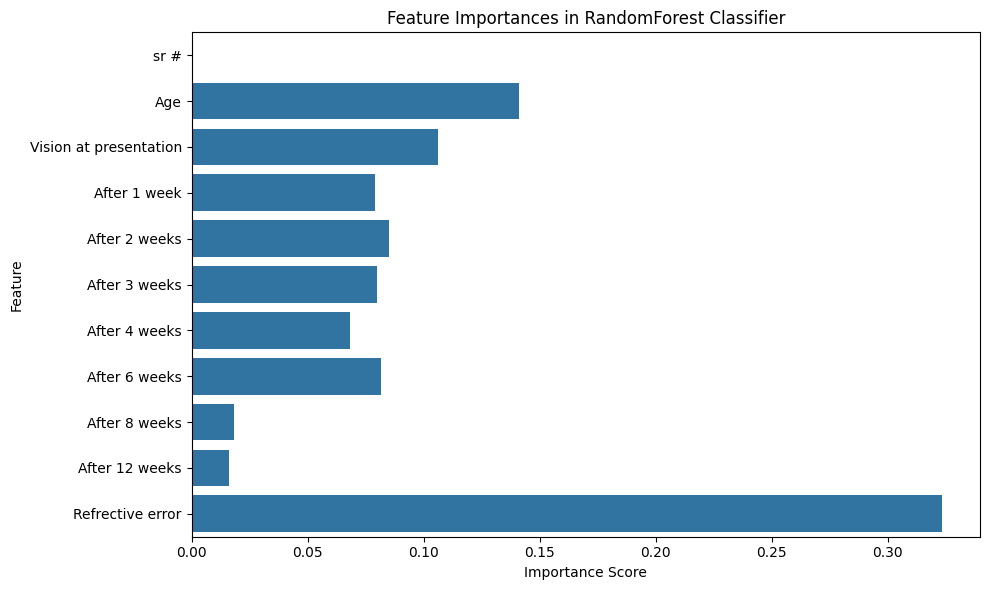

In [128]:
feature_importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances in RandomForest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [129]:
joblib.dump(model, 'random_forest_amblyopic_eye_model.pkl')

['random_forest_amblyopic_eye_model.pkl']